In [1]:
#Exploratory Data Analysis
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
#Data Cleaning and Feature Engineering
#checking missing values
train_data.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [9]:
#function that returns percentage of missing values in each column
def missingValues(df):
    percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    count = df.isna().sum().sort_values(ascending=False)
    diff = pd.concat([count,percentage],axis=1,keys=['Null Count','Null Percentage'])
    return diff

Training Set
Missing Values:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


<AxesSubplot:title={'center':'Training Set - Missing Values'}>

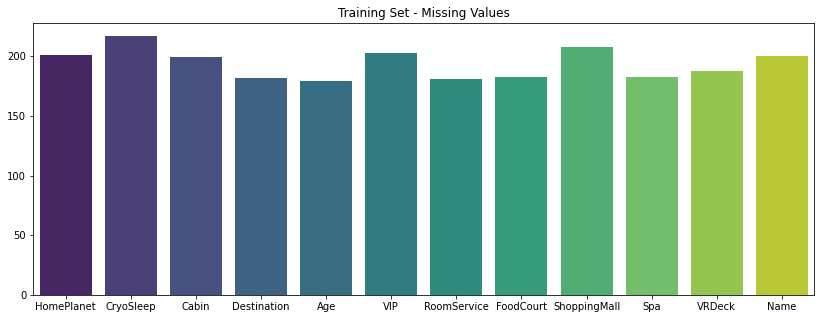

In [10]:
#data related to missing values
nan_feats_tr = train_data.columns[train_data.isna().any()].tolist()
n_nans_tr = train_data[nan_feats_tr].isna().sum()
print(f"Training Set\nMissing Values:\n{n_nans_tr}")
plt.figure(figsize=(14,5))
plt.title("Training Set - Missing Values")
sns.barplot(y=n_nans_tr,x=nan_feats_tr, palette='viridis')

In [11]:
missingValues(train_data)

,Null Count,Null Percentage
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


Testing Set
Missing Values:
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


<AxesSubplot:title={'center':'Testing Set - Missing Values'}>

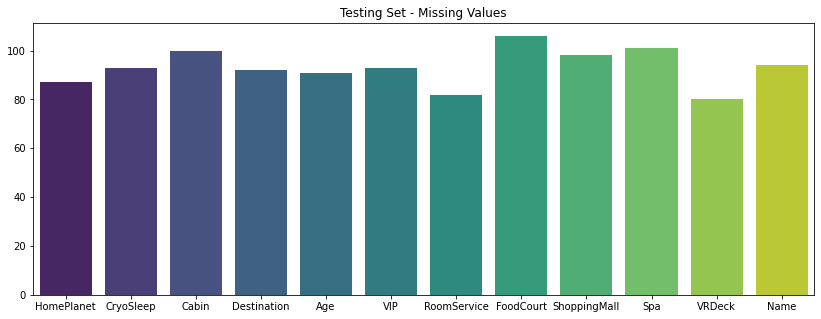

In [12]:
nan_feats_te = test_data.columns[test_data.isna().any()].tolist()
n_nans_te = test_data[nan_feats_te].isna().sum()
print(f"Testing Set\nMissing Values:\n{n_nans_te}")
plt.figure(figsize=(14,5))
plt.title("Testing Set - Missing Values")
sns.barplot(y=n_nans_te,x=nan_feats_te, palette='viridis')

In [13]:
missingValues(test_data)

,Null Count,Null Percentage
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
CryoSleep,93,2.174421
VIP,93,2.174421
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136


In [14]:
#let's create 2 new features: aaaa and bb
aaaa_bb = train_data['PassengerId'].apply(lambda x: x.split('_')).values
aaaa = list(map(lambda x: x[0], aaaa_bb))
bb = list(map(lambda x: x[1], aaaa_bb))
train_data['aaaa'] = aaaa
train_data['bb'] = bb
train_data['bb'] = train_data['bb'].astype('int64')

In [15]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,aaaa,bb
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1


In [16]:
mode = train_data["aaaa"].mode()[0]
maxP_inGroup = len(train_data[train_data["aaaa"] == mode])
print("The maximum number of passengers in a single group is",maxP_inGroup)

The maximum number of passengers in a single group is 8


In [17]:
train_data[train_data["aaaa"] == mode]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,aaaa,bb
910,0984_01,Earth,False,G/150/S,TRAPPIST-1e,45.0,False,0.0,1.0,13.0,0.0,873.0,Wen Woodwin,False,0984,1
911,0984_02,Earth,False,F/182/S,TRAPPIST-1e,24.0,False,0.0,0.0,718.0,0.0,0.0,NaN,False,0984,2
912,0984_03,Earth,False,G/150/S,TRAPPIST-1e,23.0,False,0.0,0.0,490.0,0.0,319.0,Morrie Sweekstarks,False,0984,3
913,0984_04,Earth,True,G/150/S,TRAPPIST-1e,30.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Sweekstarks,True,0984,4
914,0984_05,Earth,False,F/182/S,55 Cancri e,20.0,False,0.0,11.0,0.0,136.0,1088.0,Greggy Sweekstarks,False,0984,5
915,0984_06,Earth,True,G/150/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Walley Sweekstarks,True,0984,6
916,0984_07,Earth,True,G/150/S,PSO J318.5-22,NaN,False,0.0,0.0,0.0,0.0,0.0,Shery Flemaney,False,0984,7
917,0984_08,Earth,True,G/150/S,TRAPPIST-1e,71.0,False,0.0,0.0,0.0,0.0,0.0,Alancy Flemaney,True,0984,8


Value Counts based on the group size:

Gr. size, Count
1.0    4805
2.0    1682
3.0    1020
4.0     412
5.0     265
7.0     231
6.0     174
8.0     104
Name: group_size, dtype: int64


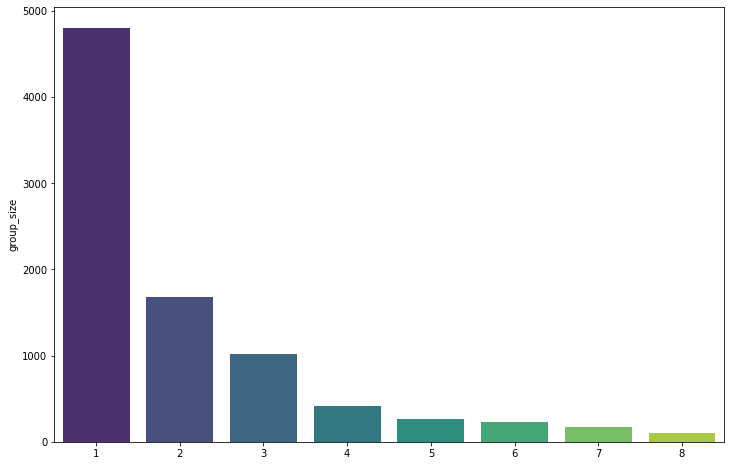

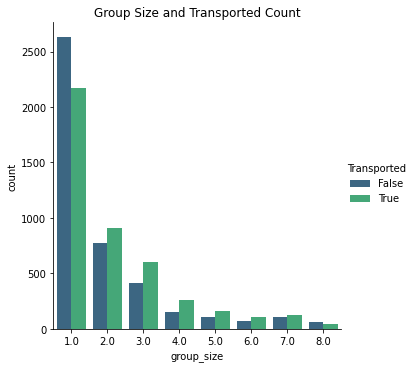

In [18]:
for i in range(maxP_inGroup):
    curr_aaaa = train_data[train_data['bb'] == i + 1]['aaaa'].to_numpy()
    train_data.loc[train_data['aaaa'].isin(curr_aaaa), ['group_size']] = i + 1

plt.figure(figsize=(12,8))
print(colored("Value Counts based on the group size:\n", 'cyan', attrs=['underline', 'bold']))
print(colored("Gr. size, Count", 'blue', attrs=['bold']))
print(train_data['group_size'].value_counts())
sns.barplot(y=train_data['group_size'].value_counts(), x=np.unique(train_data['bb']), palette='viridis')
plt.show()
sns.catplot(x="group_size",  kind="count", hue='Transported', data=train_data, palette='viridis').set(title='Group Size and Transported Count')
plt.show()

In [19]:
#splitting cabin column
train_data["Deck"] = train_data["Cabin"].apply(lambda x: str(x).split("/")[0] if(np.all(pd.notnull(x))) else x)
test_data["Deck"] = test_data["Cabin"].apply(lambda x: str(x).split("/")[0] if(np.all(pd.notnull(x))) else x)
train_data["Num"] = train_data["Cabin"].apply(lambda x: int(str(x).split("/")[1]) if(np.all(pd.notnull(x))) else x)
test_data["Num"] = test_data["Cabin"].apply(lambda x: int(str(x).split("/")[1]) if(np.all(pd.notnull(x))) else x)
train_data["Side"] = train_data["Cabin"].apply(lambda x: str(x).split("/")[2] if(np.all(pd.notnull(x))) else x)
test_data["Side"] = test_data["Cabin"].apply(lambda x: str(x).split("/")[2] if(np.all(pd.notnull(x))) else x)

In [20]:
#let's save PassengerId for the submission
Id_test_list = test_data["PassengerId"].tolist()
#let's delete useless features
train_data.drop("PassengerId",axis=1,inplace=True)
test_data.drop("PassengerId",axis=1,inplace=True)
train_data.drop("Cabin",axis=1,inplace=True)
test_data.drop("Cabin",axis=1,inplace=True)
train_data.drop("Name",axis=1,inplace=True)
test_data.drop("Name",axis=1,inplace=True)
train_data.drop("aaaa",axis=1,inplace=True)
train_data.drop("bb",axis=1,inplace=True)
train_data.drop("group_size",axis=1,inplace=True)

In [21]:
train_data.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Num             float64
Side             object
dtype: object

In [22]:
num_feats = list(train_data.select_dtypes(include='number'))
categ_feats = list(train_data.select_dtypes(exclude='number'))
test_categ_feats = list(test_data.select_dtypes(exclude='number'))
print("Numerical features:",num_feats)
print("Categorical features (training set):", categ_feats)
print("Categorical features (testing set):",test_categ_feats)

Numerical features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']
Categorical features (training set): ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side']
Categorical features (testing set): ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']


In [23]:
#let's replace missing values in each numerical feature with the median
for feat in num_feats:
    train_data[feat].fillna(train_data[feat].median(), inplace=True)
    test_data[feat].fillna(test_data[feat].median(), inplace=True)

#let's replace missing values in each categorical feature with the most frequent value
for feat in categ_feats:
    train_data[feat].fillna(train_data[feat].value_counts().index[0],inplace=True)
    
for feat in test_categ_feats:
    test_data[feat].fillna(test_data[feat].value_counts().index[0],inplace=True)

In [24]:
# let's make sure
print(colored("Training Set\n",attrs=['bold']), missingValues(train_data),end="\n\n")
print(colored("Testing Set\n",attrs=['bold']), missingValues(test_data),end="\n\n")

Training Set
               Null Count  Null Percentage
HomePlanet             0              0.0
CryoSleep              0              0.0
Destination            0              0.0
Age                    0              0.0
VIP                    0              0.0
RoomService            0              0.0
FoodCourt              0              0.0
ShoppingMall           0              0.0
Spa                    0              0.0
VRDeck                 0              0.0
Transported            0              0.0
Deck                   0              0.0
Num                    0              0.0
Side                   0              0.0

Testing Set
               Null Count  Null Percentage
HomePlanet             0              0.0
CryoSleep              0              0.0
Destination            0              0.0
Age                    0              0.0
VIP                    0              0.0
RoomService            0              0.0
FoodCourt              0              0.0
Shoppi

In [25]:
#let's print categories of each categorical column after removing unnecessary columns
for col in train_data.select_dtypes(exclude=['number']):
  print(f'{col:-<30},{train_data[col].unique()}')

HomePlanet--------------------,['Europa' 'Earth' 'Mars']
CryoSleep---------------------,[False  True]
Destination-------------------,['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP---------------------------,[False  True]
Transported-------------------,[False  True]
Deck--------------------------,['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Side--------------------------,['P' 'S']


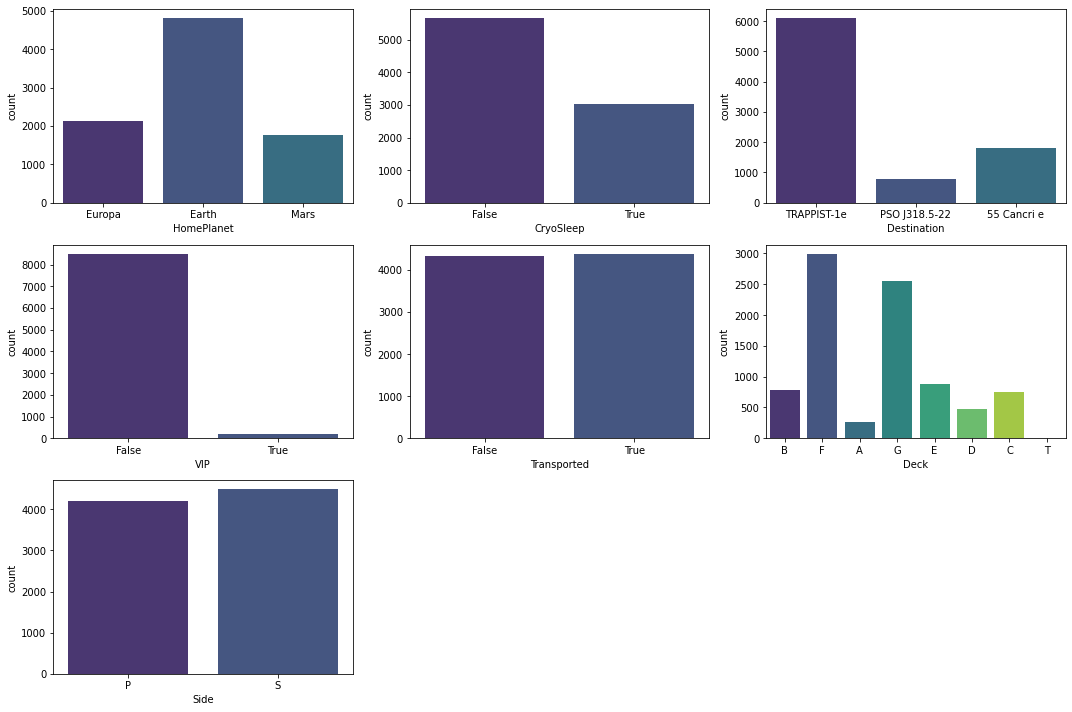

In [26]:
#let's plot distribution of categorical columns
colors =sns.color_palette('viridis', 7)

fig = plt.figure(figsize= (15,10))
for i, col in enumerate(categ_feats):
    ax=fig.add_subplot(3, 3, i+1)
    sns.countplot(x=train_data[col],palette=colors, ax=ax)

fig.tight_layout()  
plt.show()


In [27]:
print("Number of numerical features:",len(num_feats))
num_feats

Number of numerical features: 7


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

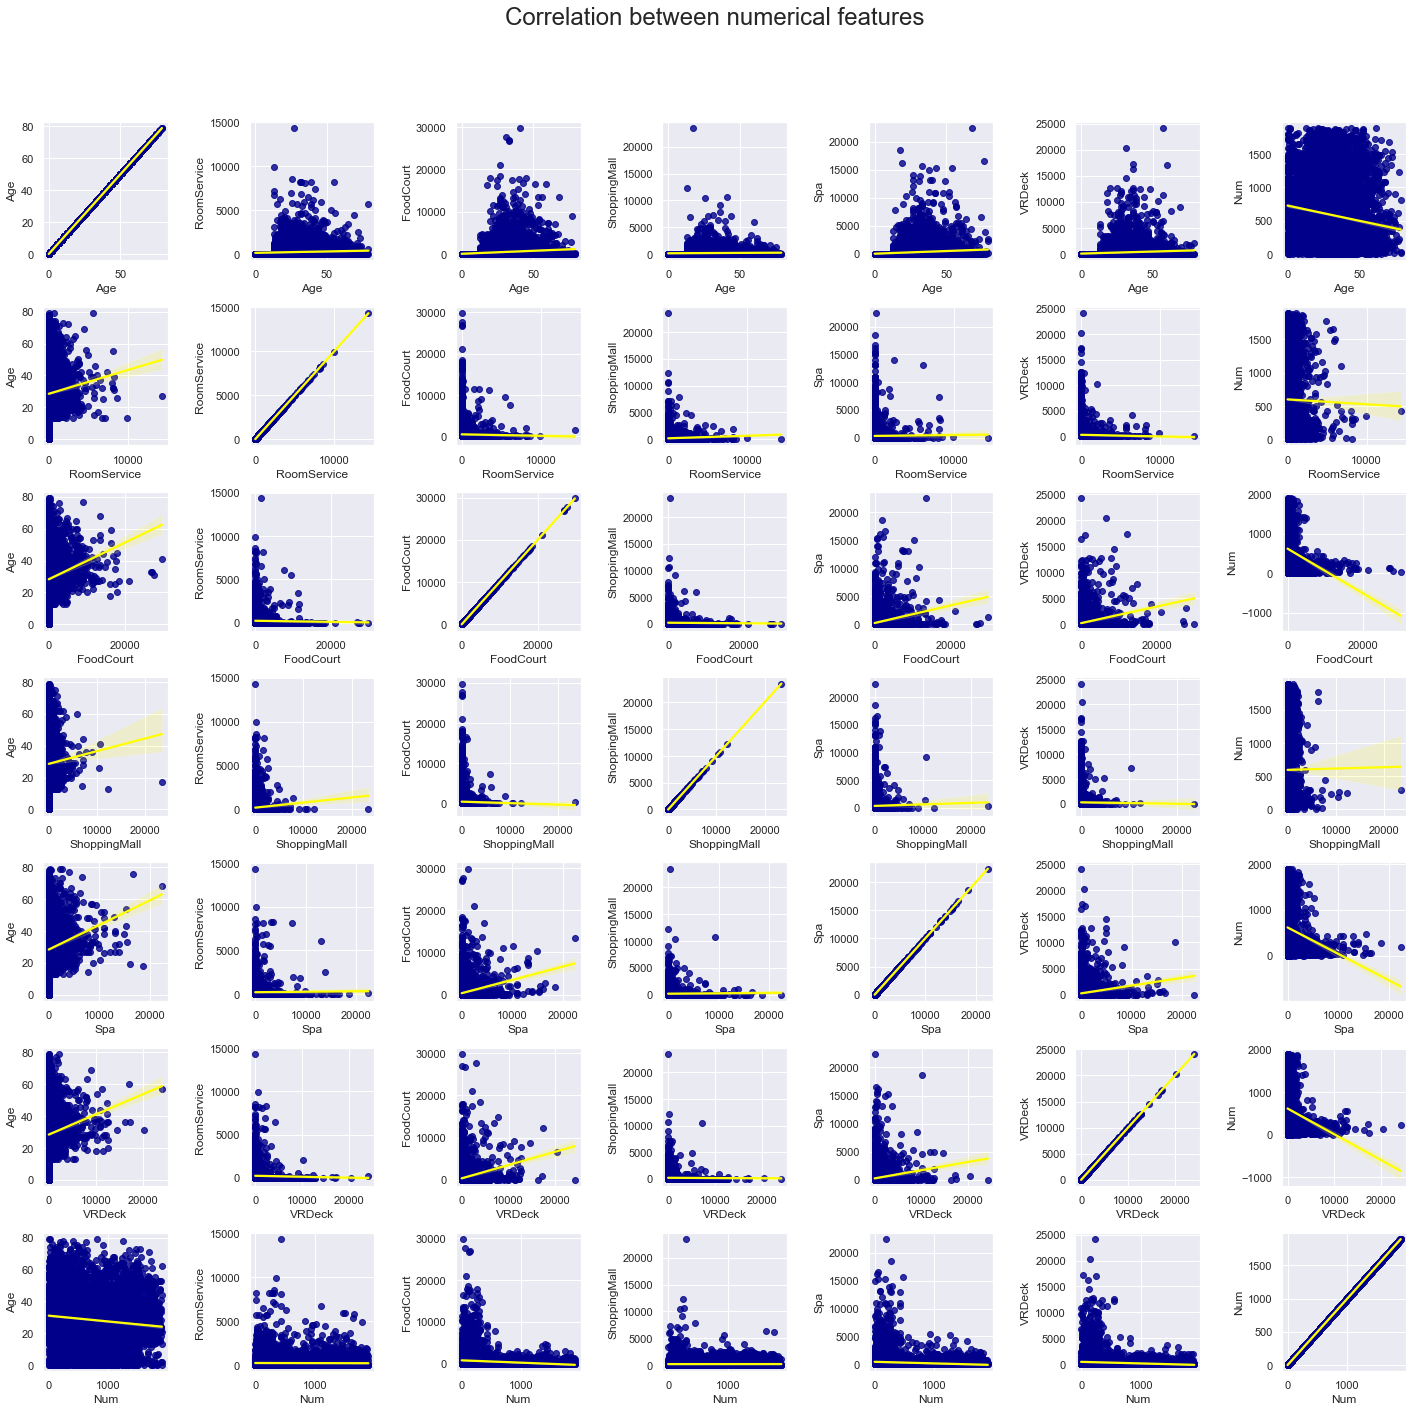

In [28]:
#data Visualisation
sns.set()
fig, axes = plt.subplots(len(num_feats), len(num_feats),figsize=(20, 20))
fig.suptitle('Correlation between numerical features', fontsize=24)
for i,col1 in enumerate(num_feats):
    for j,col2 in enumerate(num_feats):
        sns.regplot(x=col1,y=col2,data=train_data,color='blue', scatter_kws={
                    "color": "darkblue"}, line_kws={"color": "yellow"}, ax=axes[i,j])
fig.tight_layout()
plt.subplots_adjust(top=0.90)

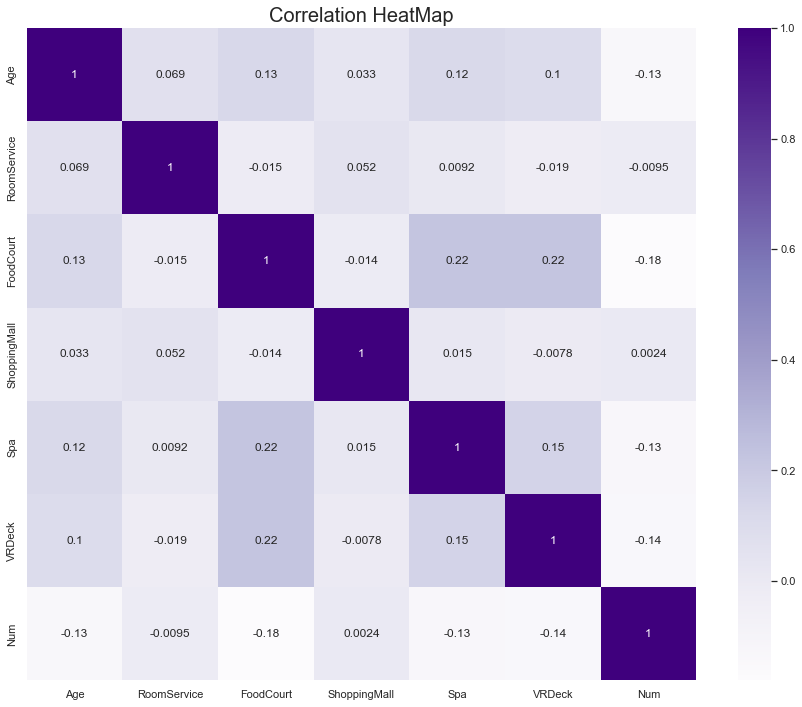

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data[num_feats].corr(),cmap='Purples',annot=True)
plt.title ('Correlation HeatMap', fontsize=20)
plt.show()

In [30]:
#encoding
LABELS = test_data.columns
encoder = LabelEncoder()
for col in LABELS:
    # Check if object
    if train_data[col].dtype == 'O':
        train_data[col] = encoder.fit_transform(train_data[col]) #fit label encoder and return encoded labels.
        test_data[col] = encoder.transform(test_data[col]) #transform labels to normalized encoding
        
    elif train_data[col].dtype == 'bool':
        train_data[col] = train_data[col].astype('int')
        test_data[col] = test_data[col].astype('int')

train_data['Transported'] = train_data['Transported'].astype('int')
LABELS_MM = ['Age']
LABELS_SS = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
mm_scaler = MinMaxScaler() #default=(0,1)
ss_scaler = StandardScaler()
# Apply Min-Max Scaling
train_data[LABELS_MM] = mm_scaler.fit_transform(train_data[LABELS_MM])
test_data[LABELS_MM] = mm_scaler.transform(test_data[LABELS_MM])
# Apply Standard Scaling
train_data[LABELS_SS] = ss_scaler.fit_transform(train_data[LABELS_SS])
test_data[LABELS_SS] = ss_scaler.transform(test_data[LABELS_SS])

In [31]:
#checking
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,0.493671,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1,0.0,0
1,0,0,2,0.303797,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,5,0.0,1
2,1,0,2,0.734177,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,0.0,1
3,1,0,2,0.417722,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,0.0,1
4,0,0,2,0.202532,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.518987,1,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0,0,98.0,0
8689,0,1,1,0.227848,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,6,1499.0,1
8690,0,0,2,0.329114,0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1,6,1500.0,1
8691,1,0,0,0.405063,0,-0.333105,0.376365,-0.283579,0.043013,2.589576,0,4,608.0,1


No of dimensions: 12


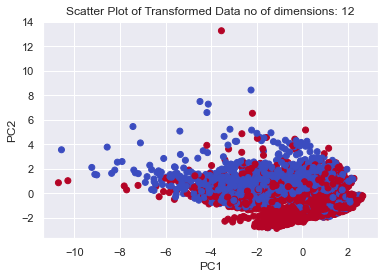

In [32]:
#pca
df = train_data
df1 = df[df.columns[-4]].copy()
df.drop(df.columns[-4], axis=1, inplace=True)
# Standardize the data
scaler = StandardScaler()
df_standard = scaler.fit_transform(df)

# Compute the covariance matrix
df_cov = np.cov(df_standard.T)

# Calculate eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(df_cov)

# Sort eigenvalues in descending order
sorted_idx = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_idx]
eig_vectors = eig_vectors[:, sorted_idx]

# Set the desired variance explained
variance_explained = 0.95
total_variance = np.sum(eig_values)

# Determine the number of dimensions (k) to retain
k = 0
variance_sum = 0
while (variance_sum / total_variance < variance_explained):
    variance_sum += eig_values[k]
    k += 1

print("No of dimensions: " + str(k))

# Select the top k eigenvectors
top_k_eigenvectors = eig_vectors[:, :k]

# Perform dimensionality reduction using PCA
X_pca = np.dot(df_standard, top_k_eigenvectors)

# Create a scatter plot of the transformed data
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df1.values, cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter Plot of Transformed Data' + " no of dimensions: " + str(k))

plt.show()

In [33]:
#different models
x=train_data[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Deck', 'Num', 'Side']]
y=train_data['Transported']

KeyError: 'Transported'

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
X_train.dtypes

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accKNN = knn.score(X_test, y_test)
accKNN

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accLogreg = logreg.score(X_test, y_test)

In [ ]:
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
accLinsvm = linear_svm.score(X_test, y_test)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
accTree = tree.score(X_test, y_test)

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
accForest = forest.score(X_test, y_test)

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
accGbrt = gbrt.score(X_test, y_test)

In [ ]:
models = pd.DataFrame({
    'Model': ['KNeighbors', 'LogisticRegression', 'LinearSVC', 
              'DecisionTree', 'RandomForest', 
              'GradientBoosting'],
    'Score': [accKNN, accLogreg, accLinsvm, accTree, accForest, accGbrt]})
models.sort_values(by='Score', ascending=False)

In [ ]:
#Submission
pred=pd.Series(gbrt.predict(test_data)).map({0:False, 1:True})
len(pred)

In [ ]:
submission = pd.DataFrame({'PassengerId': Id_test_list,
                       'Transported': pred})
submission.head()

In [ ]:
submission.to_csv("submission_output.csv", index=False)
print("Submission was successfully saved!")